# Лабораторная работа 2
Визуализация данных

Выполнил: 6133-010402D, Богданова Юлия Николаевна

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
# вывод графиков в ячейках как картинку
%matplotlib inline 
import matplotlib.pyplot as plt

0 Загружаем в pandas любой набор данных, в котором есть как минимум пара числовых колонок и как минимум одна категориальная с небольшим числом категорий. Опишите ваши данные, что обозначает каждый столбец, какого типа (категориальный, вещественный, целочисленный, бинарный) данный столбец, при необходимости для категориальных в том числе бинарных признаков привести расшифровку их значений. В общем, проведите "визуальный" анализ ваших данных.  
Каждый график необходимо снабдить комментарием

## Dataset Description

Link do dataset src: https://www.kaggle.com/janiobachmann/bank-marketing-dataset  
Link do dataset description: http://archive.ics.uci.edu/ml/datasets/Bank+Marketing#
The data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution in year 2014.   
The __classification goal__ is to predict if the client will subscribe a term __deposit__.

Input variables:  
__bank client data:__  
1 - age (numeric)  
2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed')  
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')  
5 - default: has credit in default? (categorical: 'no','yes','unknown')  
6 - balance: (numeric)  
7 - housing: has housing loan? (categorical: 'no','yes','unknown')  
8 - loan: has personal loan? (categorical: 'no','yes','unknown')  
__related with the last contact of the current campaign:__   
9 - contact: contact communication type (categorical: 'cellular','telephone')  
10 - day: last contact day of the month (numeric)  
11 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')  
12 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.  
__other attributes:__  
13 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)  
14 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)  
15 - previous: number of contacts performed before this campaign and for this client (numeric)  
16 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','other','success', 'uknown')  
__Output variable (desired target):__  
17 - y - has the client subscribed a term deposit? (binary: 'yes','no')  

Таблица 11162 rows × 17 columns.   
Missing Attribute Values: None.  

In [2]:
dataset_df = pd.read_csv("./datasets/bank_marketing.csv") 

In [3]:
dataset_df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [4]:
dataset_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


## 1 Matplotlib
Графики должны быть разных типов и хотя бы два из них должны быть связаны с вашим датасетом.
Хотя бы в одном графике подпишите оси.
Во всех графиках подписать название графика.

Text(0.5, 0, 'Did they make a deposit?')

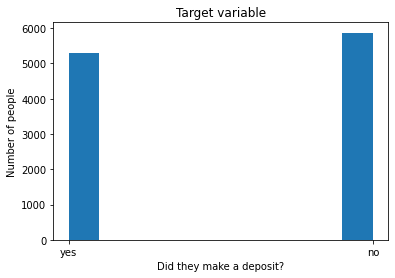

In [5]:
# 1.1 Построить любой график (любого рода) с помощью чистого matplotlib / pylab
plt.hist(dataset_df.deposit)
plt.title("Target variable")
plt.ylabel("Number of people")
plt.xlabel("Did they make a deposit?")

In [25]:
dataset_df['default'].unique()

array(['no', 'yes'], dtype=object)

In [14]:
# Define colors for bar graphs
color_palette = plt.cm.get_cmap("turbo").colors
color_palette = [color_palette[i] for i in np.arange(0, 256, 256//10, dtype='int64')]

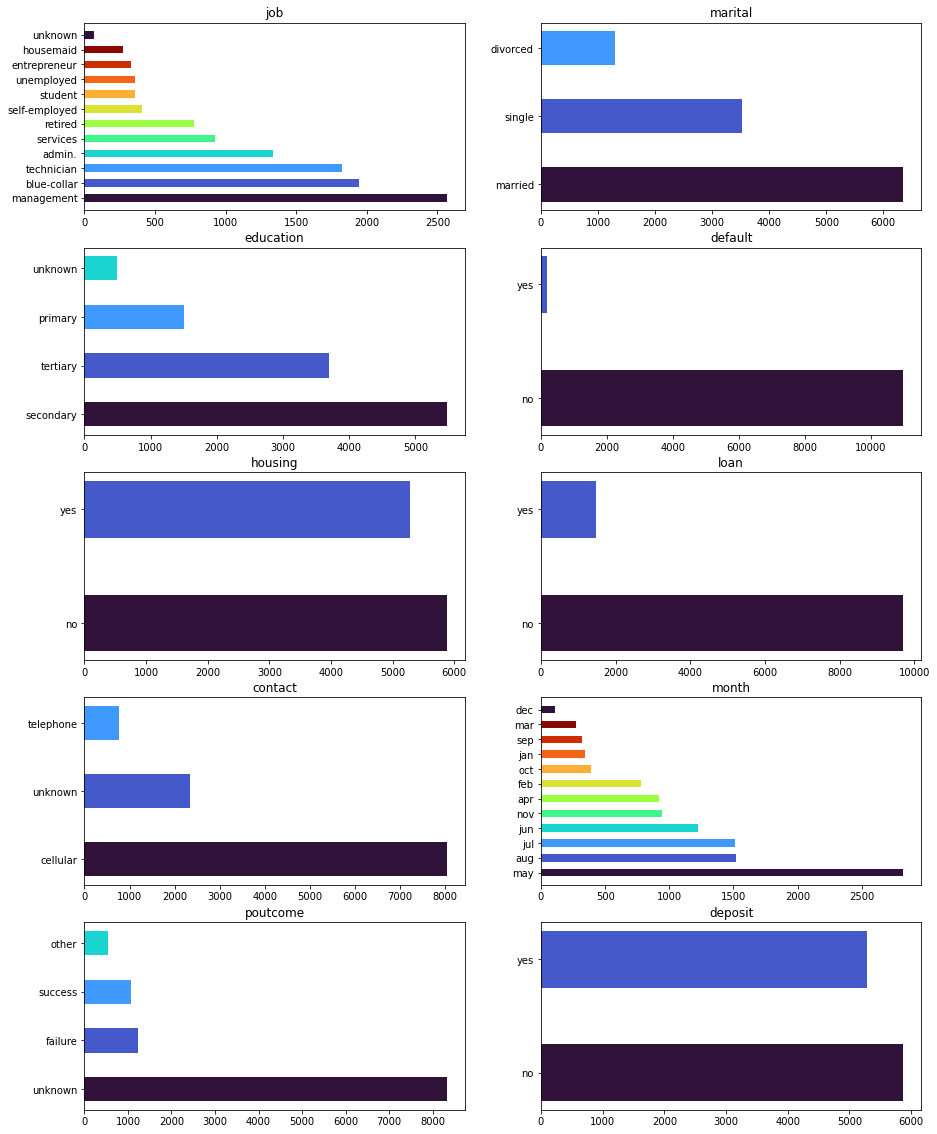

In [18]:
# 1.2 Построить несколько суб-графиков на одном графике используя .subplot.

# Categorical variables (exept 'age')
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(15,20))

for k in zip(axes.flat, dataset_df.select_dtypes(include='object').keys()):
    x = dataset_df[k[1]].value_counts()
    k[0].barh(x.index, x, height=0.5, color=color_palette, )
    k[0].set_title(k[1])

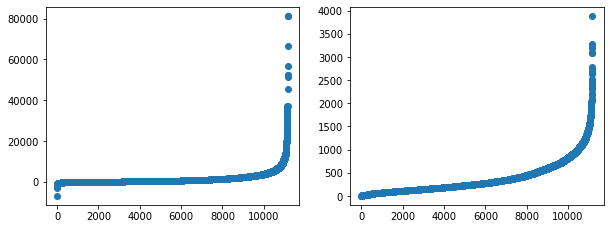

In [7]:
# Wanted to visualize this numeric variables for myself 
fig = plt.figure(figsize=(10,8))
fig.add_subplot(221)
x = np.sort(dataset_df['balance'])
plt.scatter(np.arange(0,len(x)),x)
fig.add_subplot(222)
x = np.sort(dataset_df['duration'])
plt.scatter(np.arange(0,len(x)),x)

## 2  
На основе Вашего датасета построить три разных вида графиков используя pandas.DataFrame.plot / Series.plot (мануал) Среди графиков должен присутствовать один boxplot (обязательно надо использовать параметр by, для исследования взаимосвязи числовой переменной и какой-либо другой).
Графики должны быть построены как через методы DataFrame, так и через методы Series. То есть оба варианта нужно продемонстрировать.

Text(0.5, 1.0, 'deposit: yes')

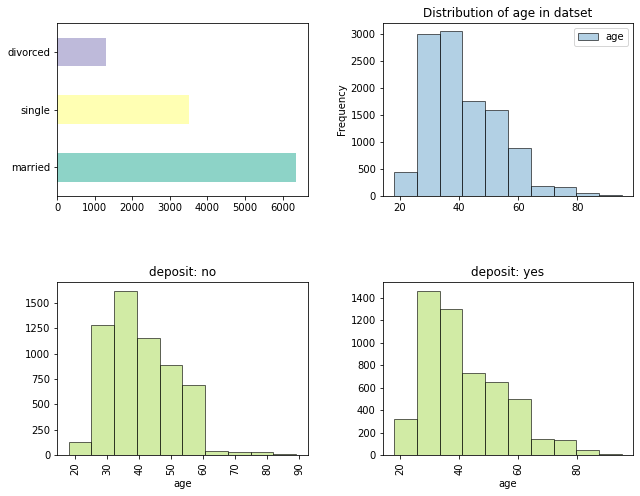

In [171]:
fig = plt.figure(figsize=(10, 8))

ax1 = fig.add_subplot(221)
dataset_df['marital'].value_counts().plot.barh(
    width=0.5, color=plt.cm.get_cmap("Set3").colors)

ax2 = fig.add_subplot(222)
dataset_df.plot(y='age', kind='hist', ax=ax2, color=plt.cm.get_cmap(
    "Set3").colors[4],  edgecolor='black', alpha=0.6)
ax2.set_title('Distribution of age in datset')

ax3 = fig.add_subplot(223)
ax4 = fig.add_subplot(224)
dataset_df.hist(column='age', by='deposit', ax=[ax3, ax4], color=plt.cm.get_cmap(
    "Set3").colors[6],  edgecolor='black', alpha=0.6)
ax3.set_xlabel('age')
ax3.set_title('deposit: no')
ax4.set_xlabel('age')
ax4.set_title('deposit: yes')

<AxesSubplot:title={'center':'duration'}, xlabel='loan'>

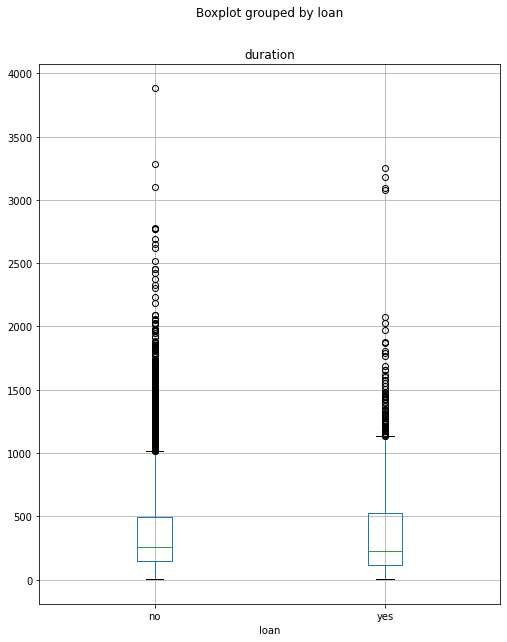

In [141]:
dataset_df.boxplot(column='duration', by='loan', figsize=(8,10))

## 3  Seaborn

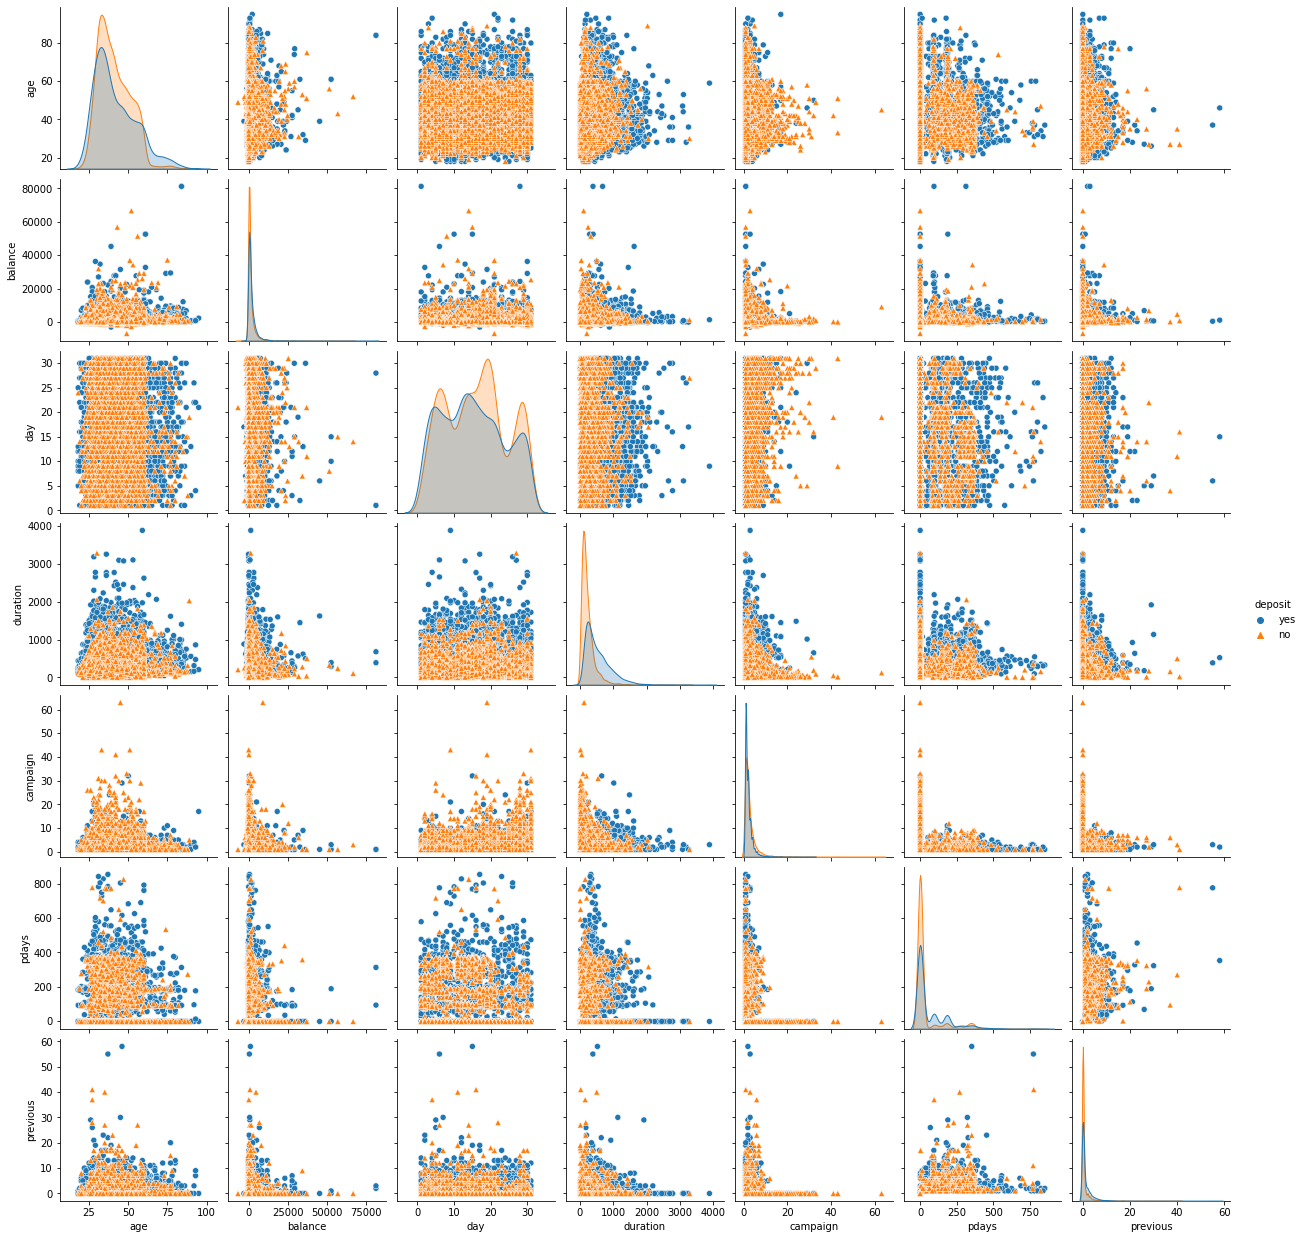

In [22]:
# 3.1 Построить .pairplot с помощью seaborn на каком-либо наборе данных, 
# проанализировав взаимосвязь набора числовых переменных
sns.pairplot(dataset_df, hue='deposit', markers=['o', '^'])

Числовые переменные очень слабо коррелируют между собой.

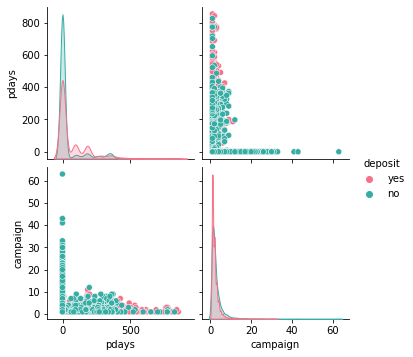

In [32]:
sns.pairplot(dataset_df, vars=['pdays', 'campaign'], hue='deposit', palette='husl')

Количество дней с последнего контакта с клиентом и какой был количество контактов в данной кампании

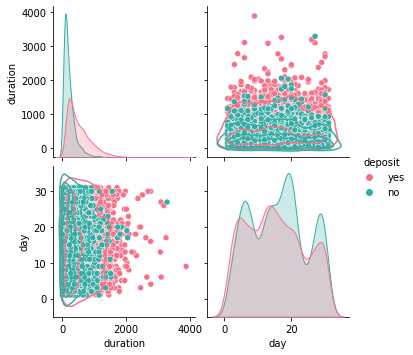

In [20]:
g = sns.pairplot(dataset_df, vars=['duration', 'day'], hue='deposit', palette='husl', diag_kind="kde")
g.map_offdiag(sns.kdeplot, levels=4, color=".2")

Длительность контакта и то, в какой день месяца это было, тоже не коррелирует.

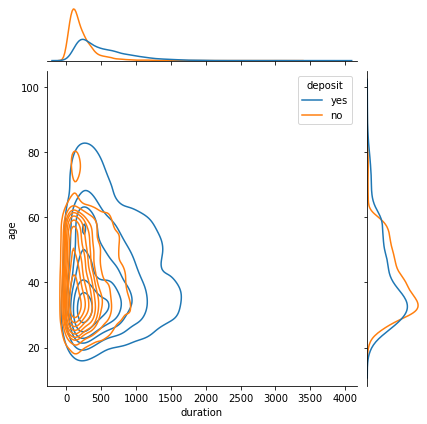

In [27]:
# 3.2 Построить .jointplot, проанализировав взаимосвязь двух конкретных числовых переменных
sns.jointplot(data=dataset_df, x='duration', y='age', hue='deposit', kind='kde')

<AxesSubplot:xlabel='deposit', ylabel='age'>

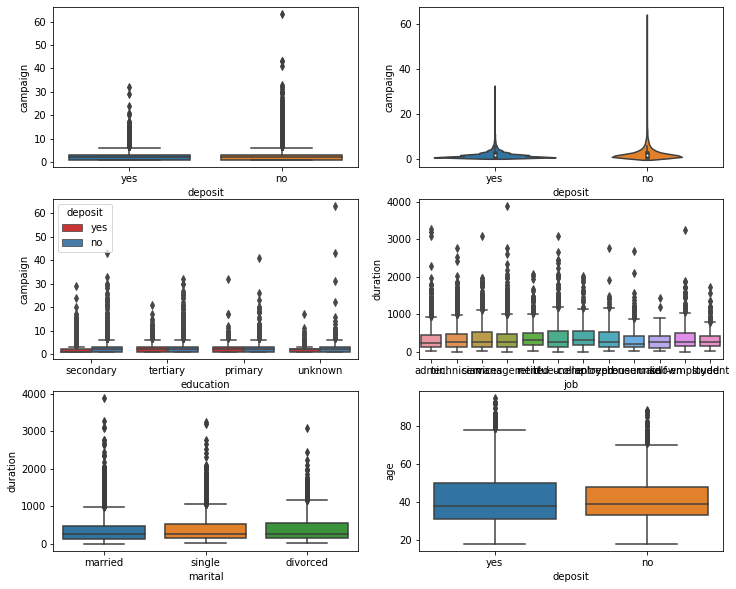

In [54]:
# 3.3 Построить .boxplot или .violinplot на каком-либо наборе данных, 
# проанализировав какой-то числовой показатель в разрезе категориального
fig = plt.figure(figsize=(12,10))

fig.add_subplot(321)
sns.boxplot(data=dataset_df, x='deposit', y='campaign')
fig.add_subplot(322)
sns.violinplot(data=dataset_df, x='deposit', y='campaign')
fig.add_subplot(323)
sns.boxplot(data=dataset_df, x='education', y='campaign', hue='deposit', palette='Set1')
            
fig.add_subplot(324)
sns.boxplot(data=dataset_df, x='job', y='duration')
fig.add_subplot(325)
sns.boxplot(data=dataset_df, x='marital', y='duration')
fig.add_subplot(326)
sns.boxplot(data=dataset_df, x='deposit', y='age')

Первые графики покаывают то, что количество контактовс клиентом, который согласился на депозит, очевидно, меньше, и среднее значение одинаково.
Переменная duration очень сильно зависима от disposit, поэтому используем ее для вертикальной оси, чтобы увидеть влияие на целевую переменнную. Среднее значение везде применрое одинаковое.

(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5]),
 [Text(0, 0.5, 'age'),
  Text(0, 1.5, 'balance'),
  Text(0, 2.5, 'day'),
  Text(0, 3.5, 'duration'),
  Text(0, 4.5, 'campaign'),
  Text(0, 5.5, 'pdays'),
  Text(0, 6.5, 'previous')])

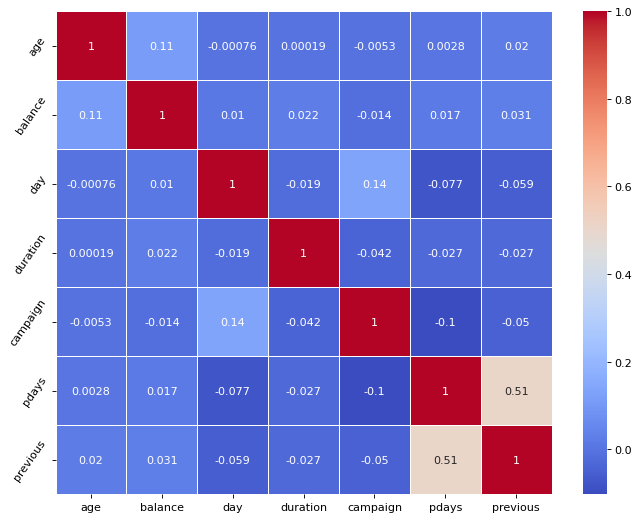

In [56]:
# 3.4 Построить график heatmap попарной корреляции всех числовых признаков (категориальные признаки убираете из графика)
plt.figure(figsize=(10,8),dpi=80)
sns.heatmap(dataset_df.select_dtypes(include='int64').corr(),cmap="coolwarm",annot=True,linewidth=0.5)
plt.yticks(rotation=55)

## 4 
Построить QQ-график (и гистограмму) для одного из числовых признаков с целью проверки на соответствие его распределения нормальному распределению

In [57]:
from scipy import stats

<AxesSubplot:>

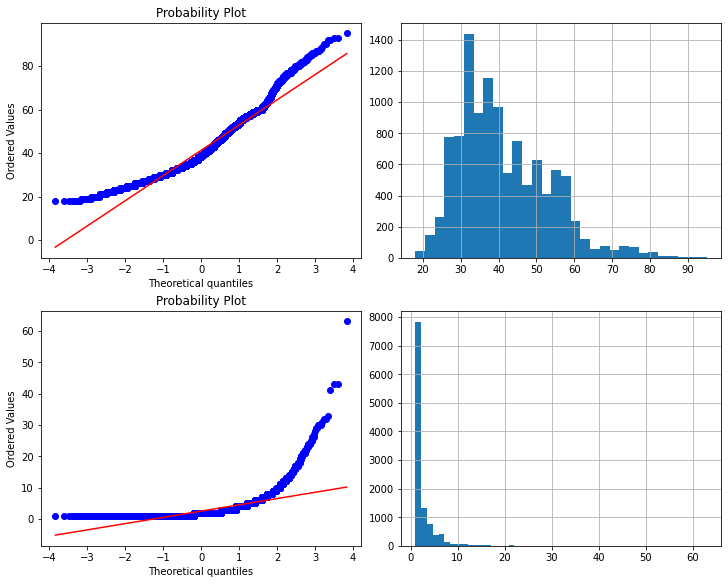

In [73]:
fig = plt.figure(figsize=(10, 8), constrained_layout=True)

fig.add_subplot(221)
stats.probplot(dataset_df['age'], dist="norm", plot=plt)
fig.add_subplot(222)
dataset_df['age'].hist(bins = 30)
fig.add_subplot(223)
stats.probplot(dataset_df['campaign'], dist="norm", plot=plt)
fig.add_subplot(224)
dataset_df['campaign'].hist(bins = 50)

Возраст похож на нормальное распредление. Количество контактов во время кампании держится в основном ближе к 0, и равномерно падает количество людей, которым звонили более 1 раза.

## 5 
Построить любой график (связанный с вашими данными) с помощью plotly

In [75]:
import plotly.express as px

In [82]:
fig = px.histogram(dataset_df, x='month', y='campaign', 
                   color='deposit', color_discrete_sequence=px.colors.qualitative.Pastel)
fig.show()

#### Additional probes

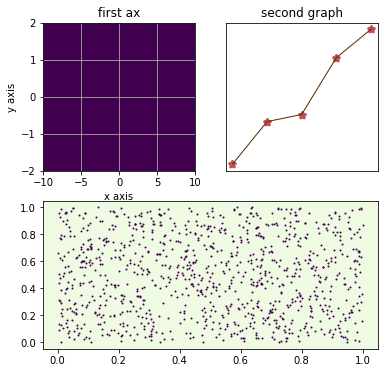

In [47]:
fig = plt.figure(figsize=(6, 6))

ax1 = fig.add_subplot(221)
#fig.set(facecolor='g')
ax1.set(facecolor='#41014f', title='first ax', xlim=[-10, 10], ylim=[-2, 2],
       xlabel='x axis', ylabel='y axis')
plt.grid()

ax2 = fig.add_subplot(222)
x = [0, 1, 2, 3, 4]
y = [0, 6, 7, 15, 19]
ax2.plot(x,y, color = '#562a00', linewidth = 1)
ax2.scatter(x,y, color = '#c15054', linewidth = 3, marker='*')
ax2.set(title='second graph', xticks=[], yticks=[])

ax3 = fig.add_subplot(212)
xx = np.random.rand(1000) 
yy = np.random.rand(1000) 
ax3.scatter(xx,yy,color='#41014f', s=1)
ax3.set(facecolor='#effae3')
plt.show()

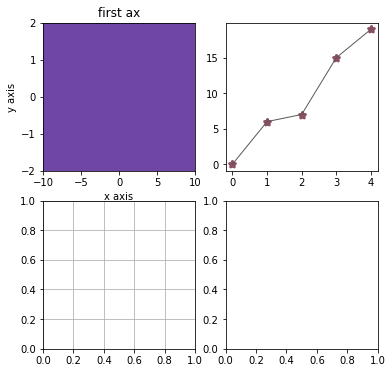

In [30]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(6,6))

axes[0,0].set(facecolor='#6f46a5', title='first ax', xlim=[-10, 10], ylim=[-2, 2],
       xlabel='x axis', ylabel='y axis')

axes[0,1].plot(x,y, color = '#5a5a55', linewidth = 1)
axes[0,1].scatter(x,y, color = '#8b4f62', linewidth = 3, marker='*')
axes[1,0].grid()

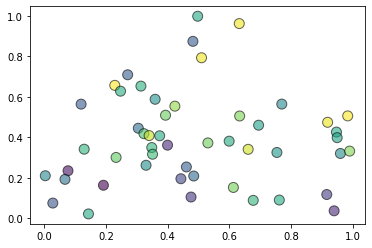

In [51]:
fig, ax = plt.subplots()
x1 = np.random.rand(50)
y1 = np.random.rand(50)
colors_2 = np.random.rand(50)
ax.scatter(x1, y1, c=colors_2, edgecolor='black', alpha=0.6, s=100)